# Data Analysis and Preprocessing of Fraud data

In [1]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys

In [2]:
sys.path.append(os.path.join(os.path.abspath('../..')))

In [5]:
# Import modules
from src import data_loading as dl
from src import data_summarry as ds
from src import formatting as fm
from src import univariate_analysis as uv

In [6]:
# Load the data set 
fraud_df = dl.load_data("Fraud_Data.csv") # Includes e-commerce transaction data aimed at identifying fraudulent activities.

In [7]:
# Data overview 
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [15]:
# Data Summary of Froudf df 
ds.data_summary(fraud_df)

Snapshot:


,
Rows,151112
Columns,11
Missing cells,0 (0.00 %)
Zeros,136961 (8.24 %)
Duplicate rows,0 (0.00 %)


In [16]:
# Data types 
ds.data_types(fraud_df)

Column Name,Inferred Data Type
user_id,numeric
signup_time,date
purchase_time,date
purchase_value,numeric
device_id,categorical
source,categorical
browser,categorical
sex,categorical
age,numeric
ip_address,numeric


##### Correct Data Type

In [17]:
# Converting date column to datetime format 
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

In [19]:
# Checking missing values
ds.missing_values(fraud_df)

There are no missing values


In [20]:
ds.constant_occurrence(fraud_df)

Column Name,0 Count,0 %
class,136961,90.635
signup_time,0,0.000
user_id,0,0.000
purchase_time,0,0.000
purchase_value,0,0.000
source,0,0.000
device_id,0,0.000
browser,0,0.000
sex,0,0.000
age,0,0.000


In [21]:
# The class are highyl skewed, let's check in detail
print(f"No Frouds: {round(fraud_df['class'].value_counts(normalize=True)[0] * 100, 2)}% of dataset")
print(f"Frouds: {round(fraud_df['class'].value_counts(normalize=True)[1] * 100, 2)}% of dataset")

No Frouds: 90.64% of dataset
Frouds: 9.36% of dataset


 - Take a closer look at our original dataset - it's heavily skewed towards non-fraudulent transactions! This poses a significant challenge for our predictive models and analysis. If we use this dataset as is, our algorithms may become overly optimistic, assuming that most transactions are legitimate. However, this is not what we want. We need our model to be vigilant and identify subtle patterns that indicate potential fraud. To achieve this, we must address the class imbalance issue head-on. By doing so, we'll ensure our model is robust and effective in detecting fraudulent activity, rather than being misled by the overwhelming majority of non-fraudulent transactions.

In [23]:
# Checking duplicate
ds.duplicate_row_count(fraud_df)

There are no duplicated rows


### Exploratory Data Analysis (EDA)
* Univariate analysis
* Bivariate analysis

#### Univariate Analysis

In [9]:
# Summary Statistics
uv.summary_statistics(fraud_df, ['purchase_value', 'age', 'class'])

,purchase_value,age,class
count,151112.000000,151112.000000,151112.000000
mean,36.935372,33.140704,0.093646
std,18.322762,8.617733,0.291336
min,9.000000,18.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,35.000000,33.000000,0.000000
75%,49.000000,39.000000,0.000000
max,154.000000,76.000000,1.000000


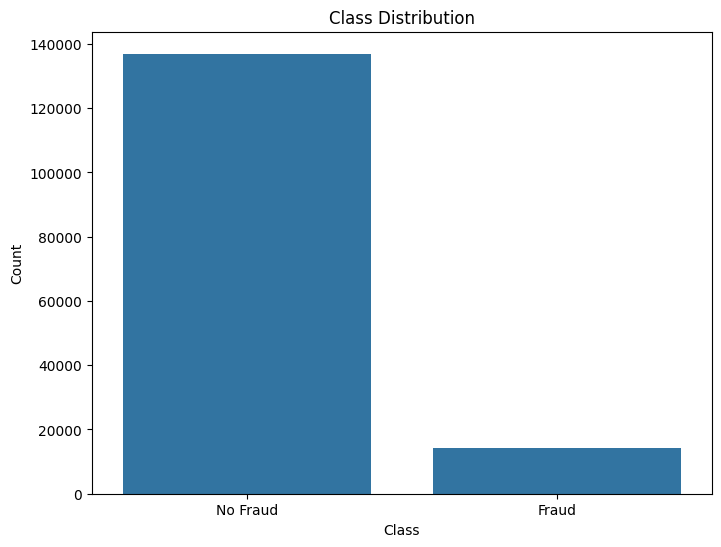

In [10]:
# Distribution of target variable (class)
uv.class_distribution(fraud_df, fraud_df['class'])

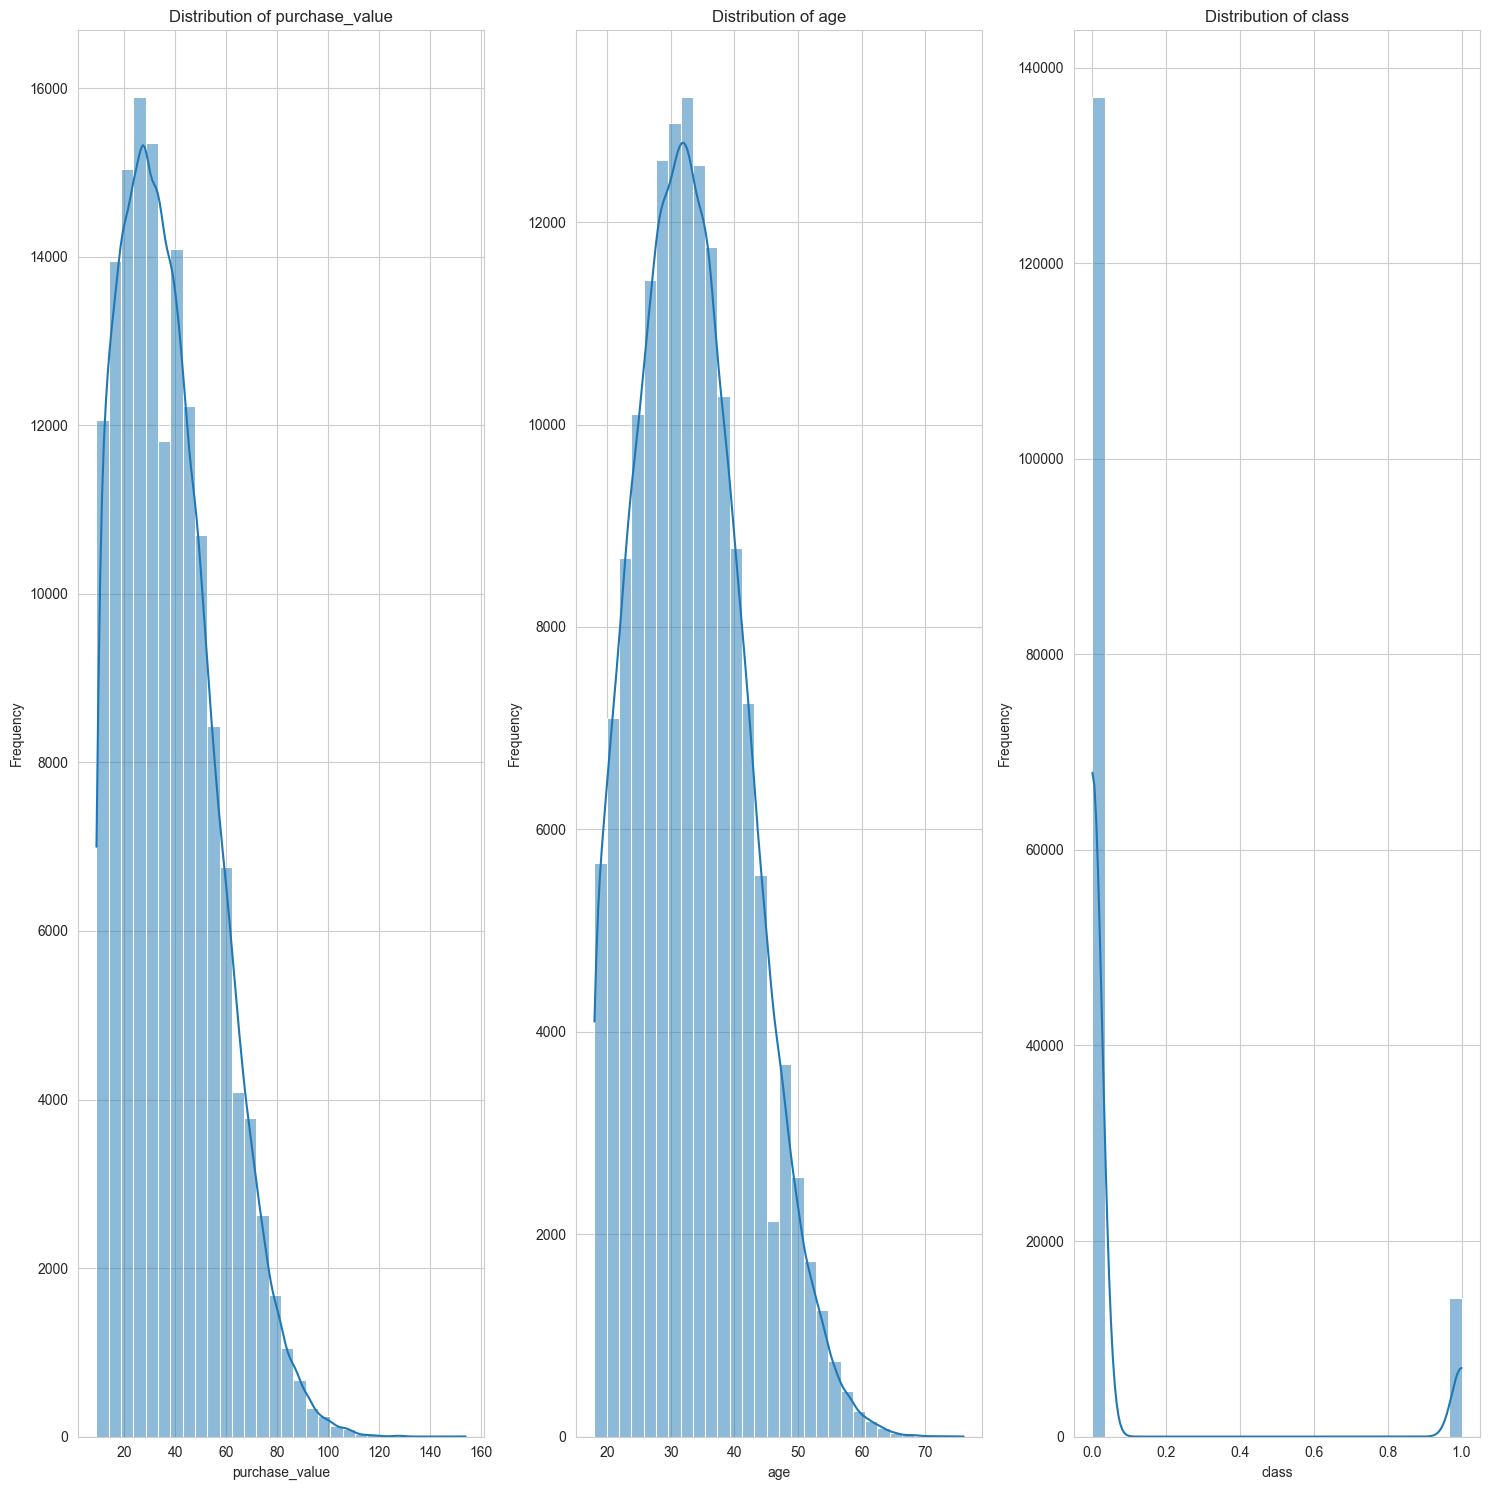

In [13]:
# Numerical distribution 
numerical_columns = ['purchase_value', 'age', 'class']
uv.numerical_distribution(fraud_df, numerical_columns)

In [12]:
# Categorical Distirbutions
categorical_columns = fraud_df[['source', 'browser', 'sex']]
uv.categorical_distribution(fraud_df, categorical_columns)

TypeError: categorical_distribution() missing 1 required positional argument: 'categorical_columns'

In [ ]:
# Distribution plots using box plots
uv.outlier_detection(fraud_df, numerical_columns)

In [ ]:
# Call the function with the path to your CSV file and a list of date columns
uv.analyze_fraud_data("fraud_df", ["signup_time", "purchase_time"])